# **Tabular Playground with Catboost**

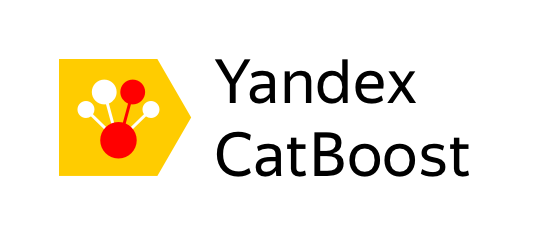

In [ ]:
import numpy as np
import pandas as pd
import itertools

from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Lets load dataset!

In [ ]:
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2022/train.csv')
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2022/test.csv')

train_df.info()

train_df.isnull().sum()

train_df.fillna(-999,inplace=True)
test_df.fillna(-999,inplace=True)

x = train_df.drop('target',axis=1)
y = train_df.target

print(x.dtypes)

# Set categorial features, split dataset, create Catboost classifier and fit it. 

In [ ]:
cate_features_index = np.where(x.dtypes != float)[0]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.85,random_state=1234)
model = CatBoostClassifier(eval_metric='Accuracy', iterations=1000, learning_rate=0.0015, use_best_model=True,random_seed=555, od_type = "Iter",  od_wait = 500)
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

# Make predict

In [ ]:
pred = model.predict(test_df)
pred_list = list(itertools.chain(*pred))

# Submission

In [ ]:
submission = pd.DataFrame({'row_id':test_df['row_id'],'target': pred_list})

submission.to_csv('submission.csv',index=False)